In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [72]:
%%time
path = '../data/hw0.csv.bz2'
flights_df = pd.read_csv(path, encoding = 'ISO-8859-1', usecols=dtype.keys(), dtype=dtype)

CPU times: user 51.4 s, sys: 308 ms, total: 51.7 s
Wall time: 50.8 s


In [93]:
flights_df.describe().T, flights_df.shape

(                       count         mean          std     min     25%  \
 Year               7009728.0  2008.000000     0.000000  2008.0  2008.0   
 Month              7009728.0     6.375130     3.406737     1.0     3.0   
 DayofMonth         7009728.0    15.728015     8.797068     1.0     8.0   
 DayOfWeek          7009728.0     3.924182     1.988259     1.0     2.0   
 DepTime            6873482.0          NaN          NaN     1.0   928.0   
 FlightNum          7009728.0  2224.200105  1961.715999     1.0   622.0   
 ArrDelay           6855029.0          NaN          NaN  -519.0   -10.0   
 DepDelay           6873482.0          NaN          NaN  -534.0    -4.0   
 Distance           7009728.0   726.387029   562.101803    11.0   325.0   
 Cancelled          7009728.0     0.019606     0.138643     0.0     0.0   
 CarrierDelay       1524735.0          NaN          NaN     0.0     0.0   
 WeatherDelay       1524735.0          NaN          NaN     0.0     0.0   
 NASDelay           15247

In [38]:
# #1

carriers = flights_df['UniqueCarrier'].unique().tolist()
len(carriers)

# Answer: 20

20

In [39]:
# #2

completed = np.sum(flights_df['Cancelled'] == 0)
cancelled = np.sum(flights_df['Cancelled'] == 1)
completed, cancelled, completed-cancelled 

# Answer: Completed overweights cancelled by 6734860 flights

(6872294, 137434, 6734860)

In [40]:
# #3

longest_arr_delay = flights_df.loc[flights_df['ArrDelay'] == flights_df['ArrDelay'].max()]
longest_dep_delay = flights_df.loc[flights_df['DepDelay'] == flights_df['DepDelay'].max()]

longest_arr_delay, longest_dep_delay

# Answer: no

(         Year  Month  DayofMonth  DayOfWeek  DepTime UniqueCarrier  FlightNum  \
 1018798  2008      2           3          7   1117.0            NW        808   
 
          ArrDelay  DepDelay Origin Dest  Distance  Cancelled CancellationCode  \
 1018798    2460.0    2456.0    HNL  MSP      3972          0              NaN   
 
          CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
 1018798        1455.0           0.0       4.0            0.0   
 
          LateAircraftDelay  
 1018798             1002.0  ,
          Year  Month  DayofMonth  DayOfWeek  DepTime UniqueCarrier  FlightNum  \
 2235378  2008      4          10          4    724.0            NW       1699   
 
          ArrDelay  DepDelay Origin Dest  Distance  Cancelled CancellationCode  \
 2235378    2452.0    2468.0    CLT  MSP       930          0              NaN   
 
          CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
 2235378        2436.0           0.0       0.0            0.0   
 
          L

In [49]:
# #4

cancelled_flights = flights_df.loc[flights_df['Cancelled'] == 1]

flights_df.shape, cancelled_flights.shape

cancelled_numbers = []
for carrier in carriers:
    carrier_cancelled_flights = cancelled_flights.loc[cancelled_flights['UniqueCarrier']==carrier].shape[0]
    print(carrier + ': ' + str(carrier_cancelled_flights))
    cancelled_numbers.append(carrier_cancelled_flights)
    
print(carriers[np.array(cancelled_numbers).argmax()], np.array(cancelled_numbers).max())
    
    
# Answer: MQ 18331

WN: 12389
XE: 9992
YV: 9219
OH: 6462
OO: 12436
UA: 10541
US: 6582
DL: 6813
EV: 5026
F9: 303
FL: 2236
HA: 570
MQ: 18331
NW: 2906
9E: 7100
AA: 17440
AQ: 42
AS: 2139
B6: 3205
CO: 3702
MQ 18331


In [75]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'].replace(to_replace=24, value=0, inplace=True)

In [78]:
len(flights_df['DepHour'].tolist())

7009728

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94a7a30668>]],
      dtype=object)

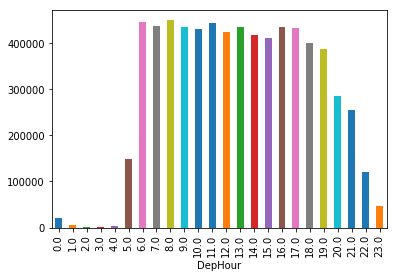

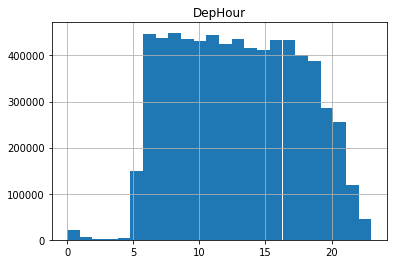

In [76]:
flights_df.groupby('DepHour').size().plot(kind='bar');
flights_df.hist('DepHour', bins=24)

In [147]:
# #5

flights_with_dephour = np.sum(flights_df.groupby('DepHour').size().values.tolist())
print(flights_with_dephour, flights_df.shape[0])
print((flights_df.groupby('DepHour').size() / flights_with_dephour), (flights_df.groupby('DepHour').size() / flights_with_dephour).values.argmax())
# departs_percentage = flights_df.groupby('DepHour').size()

# Answer: 8 am

6873482 7009728
DepHour
0.0     0.002963
1.0     0.000853
2.0     0.000269
3.0     0.000121
4.0     0.000493
5.0     0.021556
6.0     0.064994
7.0     0.063534
8.0     0.065356
9.0     0.063265
10.0    0.062772
11.0    0.064698
12.0    0.061723
13.0    0.063420
14.0    0.060650
15.0    0.059813
16.0    0.063144
17.0    0.062921
18.0    0.058309
19.0    0.056345
20.0    0.041608
21.0    0.037077
22.0    0.017408
23.0    0.006707
dtype: float64 8


In [126]:
# #6

cancels_percentage_per_hour = flights_df.loc[flights_df['Cancelled'] == 1].groupby('DepHour').size() / flights_df.groupby('DepHour').size()
cancels_percentage_per_hour[3.0] = 0
print(cancels_percentage_per_hour)
print(cancels_percentage_per_hour.values.argmin())

# Answer: 3 am
# Answer for #7: Is there any hour that didn't have any cancelled flights at all? Yes - 3 am

DepHour
0.0     0.000344
1.0     0.000682
2.0     0.000540
3.0     0.000000
4.0     0.000295
5.0     0.000162
6.0     0.000179
7.0     0.000190
8.0     0.000176
9.0     0.000129
10.0    0.000132
11.0    0.000133
12.0    0.000125
13.0    0.000108
14.0    0.000137
15.0    0.000178
16.0    0.000168
17.0    0.000169
18.0    0.000165
19.0    0.000209
20.0    0.000178
21.0    0.000322
22.0    0.000476
23.0    0.000521
dtype: float64
3


In [127]:
# #8

flights_df.loc[flights_df['Cancelled'] == 0].groupby('DepHour').size(), flights_df.loc[flights_df['Cancelled'] == 0].groupby('DepHour').size().values.argmax()

# Answer: the busiest hour (as excepted) 8 am

(DepHour
 0.0      20361
 1.0       5857
 2.0       1850
 3.0        833
 4.0       3389
 5.0     148143
 6.0     446657
 7.0     436617
 8.0     449145
 9.0     434794
 10.0    431403
 11.0    444643
 12.0    424196
 13.0    435870
 14.0    416818
 15.0    411053
 16.0    433944
 17.0    432415
 18.0    400718
 19.0    387207
 20.0    285940
 21.0    254768
 22.0    119594
 23.0     46079
 dtype: int64, 8)